In [26]:
import numpy as np
from numpy import sort
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from pandas import DataFrame
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
#from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.feature_selection import SelectFromModel

In [27]:
data = pd.read_csv("C:\\Users\Hannah\Desktop\Research Project\data.csv")
data = data.drop(["Unnamed: 32", "id"],1)

X = data.values[:,1:-1].astype('float64')
X = (X - np.mean(X, axis =0)) /  np.std(X, axis = 0)
X = np.hstack([np.ones((X.shape[0], 1)),X]) 
X = MinMaxScaler().fit_transform(X)
Y = data["diagnosis"].map({'M':1,'B':0})
Y = np.array(Y)

In [28]:
###### SelectFromModel Features #######
X_select = data[['texture_mean', 'smoothness_mean', 'compactness_mean',
       'radius_se', 'symmetry_se', 'symmetry_mean', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
        'area_worst', 'smoothness_worst',
       'compactness_worst', 'symmetry_worst']]

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X_select, Y, test_size=0.25, random_state=0)
print(X_train.shape)

(426, 13)


In [30]:
def Sigmoid(z):
    return 1/(1 + np.exp(-z))

In [31]:
def Hypothesis(theta, x):   
    return Sigmoid(x @ theta)

In [32]:
def Cost_Function(X,Y,theta,m):
    hi = Hypothesis(theta, x)
    _y = Y.reshape(-1, 1)
    J = 1/float(m) * np.sum(-_y * np.log(hi) - (1-_y) * np.log(1-hi))
    return J

In [33]:
def Cost_Function_Regularisation(X,Y,theta,m,alpha):
    hi = Hypothesis(theta,X)
    _y = Y.reshape(-1, 1)
    J = alpha/float(m) * X.T @ (hi - _y)
    return J

def Gradient_Descent(X,Y,theta,m,alpha):
    new_theta = theta - Cost_Function_Regularisation(X,Y,theta,m,alpha)
    return new_theta

C:\Users\Hannah\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


SelectFromModel Features
LR Accuracy:  88.8111888112 %
Scikit-learn Accuracy score 88.811189 %
Confusion Matrix: 
 [[74 16]
 [ 0 53]]


LR Report:
             precision    recall  f1-score   support

     Benign       1.00      0.82      0.90        90
  Malignant       0.77      1.00      0.87        53

avg / total       0.91      0.89      0.89       143



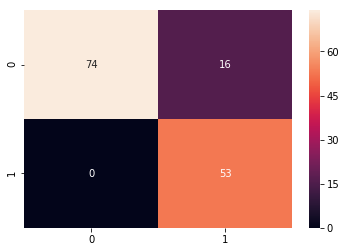

In [34]:
def Accuracy(theta):
    correct = 0
    length = len(X_test)
    prediction = (Hypothesis(theta, X_test) > 0.5) #replaced round to use predictions which are correct is ranging between the Y shape below
    _y = Y_test.reshape(-1, 1)
    correct = prediction == _y
    my_accuracy = (np.sum(correct) / length)*100
    print ('LR Accuracy: ', my_accuracy, "%")
    print("Scikit-learn Accuracy score %f" % (accuracy_score(Y_test, prediction)*100),"%")
    
    #Confusion matrix and F1 scoring
    cm= confusion_matrix(Y_test, prediction)
    print("Confusion Matrix:", "\n", cm)
    sns.heatmap(cm,annot=True,fmt="d")
    print('\n')
    print("LR Report:")
    target_names = ['Benign', 'Malignant']
    print(classification_report(Y_test, prediction, target_names=target_names))


def Logistic_Regression(X,Y,alpha,theta,num_iters):
    m = len(Y)
    for x in range(num_iters):
        new_theta = Gradient_Descent(X,Y,theta,m,alpha)
        theta = new_theta
        if x % 100 == 0:
            print #('theta: ', theta)    
            print #('cost: ', Cost_Function(X,Y,theta,m))
    print("SelectFromModel Features")
    Accuracy(theta)


ep = .012   #sets initial theta to random non zero numbers +/- .012 specifically is arbitrary

initial_theta = np.random.rand(X_train.shape[1],1) * 2 * ep - ep
alpha = 0.9
iterations = 100000
Logistic_Regression(X_train,Y_train,alpha,initial_theta,iterations)

In [35]:
##### SelectKBest Features #####
X_select2 = data[['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'radius_worst', 
                  'perimeter_worst', 'area_worst', 'concavity_worst', 'concave points_worst']]

X_train, X_test, Y_train, Y_test = train_test_split(X_select2, Y, test_size=0.25, random_state=0)
print(X_train.shape)

(426, 10)


C:\Users\Hannah\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


SelectKBest Features
LR Accuracy:  91.6083916084 %
Scikit-learn Accuracy score 91.608392 %
Confusion Matrix: 
 [[83  7]
 [ 5 48]]


LR Report:
             precision    recall  f1-score   support

     Benign       0.94      0.92      0.93        90
  Malignant       0.87      0.91      0.89        53

avg / total       0.92      0.92      0.92       143

SelectKBest Features
LR Accuracy:  91.6083916084 %
Scikit-learn Accuracy score 91.608392 %
Confusion Matrix: 
 [[83  7]
 [ 5 48]]


LR Report:
             precision    recall  f1-score   support

     Benign       0.94      0.92      0.93        90
  Malignant       0.87      0.91      0.89        53

avg / total       0.92      0.92      0.92       143



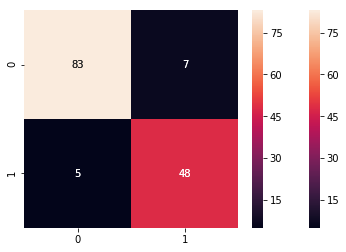

In [36]:
def Accuracy(theta):
    correct = 0
    length = len(X_test)
    prediction = (Hypothesis(theta, X_test) > 0.5) #replaced round to use predictions which are correct is ranging between the Y shape below
    _y = Y_test.reshape(-1, 1)
    correct = prediction == _y
    my_accuracy = (np.sum(correct) / length)*100
    print ('LR Accuracy: ', my_accuracy, "%")
    print("Scikit-learn Accuracy score %f" % (accuracy_score(Y_test, prediction)*100),"%")
    
    #Confusion matrix and F1 scoring
    cm= confusion_matrix(Y_test, prediction)
    print("Confusion Matrix:", "\n", cm)
    sns.heatmap(cm,annot=True,fmt="d")
    print('\n')
    print("LR Report:")
    target_names = ['Benign', 'Malignant']
    print(classification_report(Y_test, prediction, target_names=target_names))


def Logistic_Regression(X,Y,alpha,theta,num_iters):
    m = len(Y)
    for x in range(num_iters):
        new_theta = Gradient_Descent(X,Y,theta,m,alpha)
        theta = new_theta
        if x % 100 == 0:
            print #('theta: ', theta)    
            print #('cost: ', Cost_Function(X,Y,theta,m))
    print("SelectKBest Features")
    Accuracy(theta)


ep = .012   #sets initial theta to random non zero numbers +/- .012 specifically is arbitrary

initial_theta = np.random.rand(X_train.shape[1],1) * 2 * ep - ep
alpha = 0.9
iterations = 100000
Logistic_Regression(X_train,Y_train,alpha,initial_theta,iterations)

In [41]:
##### Chi2 Features #####
X_select3 = data[['radius_mean','compactness_mean','concavity_mean','concave points_mean', 'radius_worst', 'compactness_worst',
                 'concavity_worst', 'concave points_worst', 'area_mean','perimeter_worst', 'area_worst','perimeter_se','area_se']]
                 

X_train, X_test, Y_train, Y_test = train_test_split(X_select3, Y, test_size=0.25, random_state=0)
print(X_train.shape)

(426, 13)


C:\Users\Hannah\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Chi2 Features
LR Accuracy:  93.006993007 %
Scikit-learn Accuracy score 93.006993 %
Confusion Matrix: 
 [[86  4]
 [ 6 47]]


LR Report:
             precision    recall  f1-score   support

     Benign       0.93      0.96      0.95        90
  Malignant       0.92      0.89      0.90        53

avg / total       0.93      0.93      0.93       143



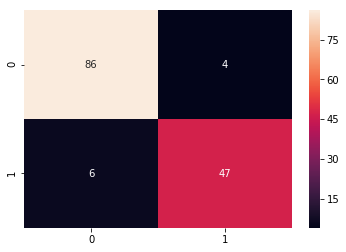

In [38]:
def Accuracy(theta):
    correct = 0
    length = len(X_test)
    prediction = (Hypothesis(theta, X_test) > 0.5) #replaced round to use predictions which are correct is ranging between the Y shape below
    _y = Y_test.reshape(-1, 1)
    correct = prediction == _y
    my_accuracy = (np.sum(correct) / length)*100
    print ('LR Accuracy: ', my_accuracy, "%")
    print("Scikit-learn Accuracy score %f" % (accuracy_score(Y_test, prediction)*100),"%")
    
    #Confusion matrix and F1 scoring
    cm= confusion_matrix(Y_test, prediction)
    print("Confusion Matrix:", "\n", cm)
    sns.heatmap(cm,annot=True,fmt="d")
    print('\n')
    print("LR Report:")
    target_names = ['Benign', 'Malignant']
    print(classification_report(Y_test, prediction, target_names=target_names))


def Logistic_Regression(X,Y,alpha,theta,num_iters):
    m = len(Y)
    for x in range(num_iters):
        new_theta = Gradient_Descent(X,Y,theta,m,alpha)
        theta = new_theta
        if x % 100 == 0:
            print #('theta: ', theta)    
            print #('cost: ', Cost_Function(X,Y,theta,m))
    print("Chi2 Features")
    Accuracy(theta)


ep = .012   #sets initial theta to random non zero numbers +/- .012 specifically is arbitrary

initial_theta = np.random.rand(X_train.shape[1],1) * 2 * ep - ep
alpha = 0.9
iterations = 100000
Logistic_Regression(X_train,Y_train,alpha,initial_theta,iterations)

In [39]:
#L1norm Coefficient Feature Selection
X_select4 = data[['texture_mean', 'compactness_mean', 'concave points_mean', 'symmetry_mean', 'radius_se', 'texture_se',
                  'perimeter_se', 'compactness_se', 'concavity_se','concave points_se','symmetry_se', 'fractal_dimension_se',
                  'perimeter_worst', 'smoothness_worst', 'compactness_worst', 'symmetry_worst', 'fractal_dimension_worst']]


X_train, X_test, Y_train, Y_test = train_test_split(X_select4, Y, test_size=0.25, random_state=0)
print(X_train.shape)

(426, 17)


C:\Users\Hannah\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


L1norm Weighted Features
LR Accuracy:  72.7272727273 %
Scikit-learn Accuracy score 72.727273 %
Confusion Matrix: 
 [[84  6]
 [33 20]]


LR Report:
             precision    recall  f1-score   support

     Benign       0.72      0.93      0.81        90
  Malignant       0.77      0.38      0.51        53

avg / total       0.74      0.73      0.70       143

L1norm Weighted Features
LR Accuracy:  72.7272727273 %
Scikit-learn Accuracy score 72.727273 %
Confusion Matrix: 
 [[84  6]
 [33 20]]


LR Report:
             precision    recall  f1-score   support

     Benign       0.72      0.93      0.81        90
  Malignant       0.77      0.38      0.51        53

avg / total       0.74      0.73      0.70       143



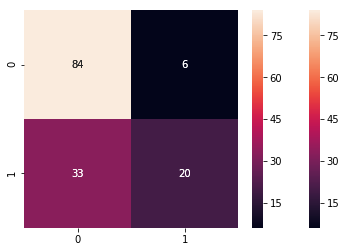

In [40]:
def Accuracy(theta):
    correct = 0
    length = len(X_test)
    prediction = (Hypothesis(theta, X_test) > 0.5) #replaced round to use predictions which are correct is ranging between the Y shape below
    _y = Y_test.reshape(-1, 1)
    correct = prediction == _y
    my_accuracy = (np.sum(correct) / length)*100
    print ('LR Accuracy: ', my_accuracy, "%")
    print("Scikit-learn Accuracy score %f" % (accuracy_score(Y_test, prediction)*100),"%")
    
    #Confusion matrix and F1 scoring
    cm= confusion_matrix(Y_test, prediction)
    print("Confusion Matrix:", "\n", cm)
    sns.heatmap(cm,annot=True,fmt="d")
    print('\n')
    print("LR Report:")
    target_names = ['Benign', 'Malignant']
    print(classification_report(Y_test, prediction, target_names=target_names))


def Logistic_Regression(X,Y,alpha,theta,num_iters):
    m = len(Y)
    for x in range(num_iters):
        new_theta = Gradient_Descent(X,Y,theta,m,alpha)
        theta = new_theta
        if x % 100 == 0:
            print #('theta: ', theta)    
            print #('cost: ', Cost_Function(X,Y,theta,m))
    print("L1norm Weighted Features")
    Accuracy(theta)


ep = .012   #sets initial theta to random non zero numbers +/- .012 specifically is arbitrary

initial_theta = np.random.rand(X_train.shape[1],1) * 2 * ep - ep
alpha = 0.9
iterations = 100000
Logistic_Regression(X_train,Y_train,alpha,initial_theta,iterations)

ep = .012   #sets initial theta to random non zero numbers +/- .012 specifically is arbitrary

initial_theta = np.random.rand(X_train.shape[1],1) * 2 * ep - ep
alpha = 0.9
iterations = 100000
Logistic_Regression(X_train,Y_train,alpha,initial_theta,iterations)